<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/Prepocessing_notebooks/Environmental_agency_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environmental Agency River Level Data Preprocessing

**Author:** Ravi Kohli

**Date:** January 27th, 2021

**College:** Christ Church

**Goal:**
- To pre-process the river level data from the Environmental Agency

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the modules
import numpy as np
import pandas as pd
from pandas import Timestamp
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Import the data

In [ ]:
# Retrieving the precipitation data
path = '/content/drive/My Drive/3YP/data/Environmental Agency/'                     # when running in a notebook in colab

filename = "Sandford_downstream_river_level - Sheet1.csv"                           # the name of the csv file
ea_river_level_df = pd.read_csv(path+filename) #, #parse_dates=[['MM','DD','YYYY']])               # converting the csv file to a dataframe

In [ ]:
# converting the data-types in the list
ea_river_level_df['Date'] = pd.to_datetime(ea_river_level_df['Time stamp'])
ea_river_level_df['Value[m]'] = pd.to_numeric(ea_river_level_df['Value[m]'])

# calculating a rolling window
ea_river_level_df['10_day_rolling_mean'] = ea_river_level_df['Value[m]'].rolling(10).mean()

In [ ]:
ea_river_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3451 entries, 0 to 3450
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time stamp           3451 non-null   object        
 1   Value[m]             3451 non-null   float64       
 2   Date                 3451 non-null   datetime64[ns]
 3   10_day_rolling_mean  3442 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 108.0+ KB


In [ ]:
# sort the values in the dataframe
ea_river_level_df.sort_values(by=['Date'], inplace = True)

In [ ]:
ea_river_level_df

,Time stamp,Value[m],Date,10_day_rolling_mean
18,01/08/2011 9:00:00,1.337,2011-01-08 09:00:00,1.3453
49,01/09/2011 9:00:00,1.349,2011-01-09 09:00:00,1.3617
79,01/10/2011 9:00:00,1.335,2011-01-10 09:00:00,1.3504
110,01/11/2011 9:00:00,1.321,2011-01-11 09:00:00,1.3324
140,01/12/2011 9:00:00,1.349,2011-01-12 09:00:00,1.3390
...,...,...,...,...
3446,19/12/2020 09:00:00,2.342,2020-12-19 09:00:00,2.1702
3447,20/12/2020 09:00:00,2.438,2020-12-20 09:00:00,2.2276
3448,21/12/2020 09:00:00,2.588,2020-12-21 09:00:00,2.2927
3449,22/12/2020 09:00:00,2.656,2020-12-22 09:00:00,2.3615


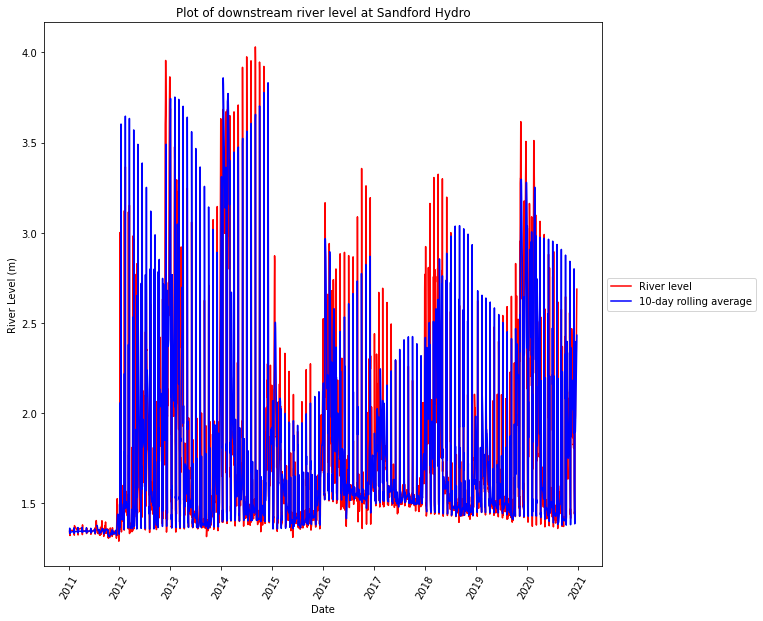

In [ ]:
# Let us plot the river level profile
level_fig, level_ax = plt.subplots(figsize = (10, 10))
level_ax.tick_params(axis='x', rotation=60)
level_ax.plot(ea_river_level_df['Date'], ea_river_level_df['Value[m]'], 'r', label = 'River level')  
level_ax.plot(ea_river_level_df['Date'], ea_river_level_df['10_day_rolling_mean'], 'b', label = '10-day rolling average')  

level_ax.set(title = 'Plot of downstream river level at Sandford Hydro', xlabel= 'Date', ylabel='River Level (m)')
level_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

That isn't useful in that form so we need to extract the required days

### Import the Sandford Generation Data

In [ ]:
# unpickle the processed daily generation dataframe
path = '/content/drive/My Drive/3YP/data/'
filename = 'daily_sandford_generation_data'
infile = open(path+filename, 'rb')
sandford_daily_df = pickle.load(infile)
infile.close()

In [ ]:
print(min(sandford_daily_df['Reading Date']), max(sandford_daily_df['Reading Date']))

2018-10-18 00:00:00 2019-10-22 00:00:00


In [ ]:
# extract the rows that we want by using a mask
# format of mask: YYYY-MM-DD
gen_mask_start = pd.to_datetime('2018-10-01')
gen_mask_end = pd.to_datetime('2019-10-22')

Extract the required rows from the river level data set

In [ ]:
ea_current_mask = (ea_river_level_df['Date'] >= gen_mask_start) & (ea_river_level_df['Date'] <= gen_mask_end)

# extract the rows from the dataframe by using the mask
ea_river_level_extracted = ea_river_level_df.loc[ea_current_mask]

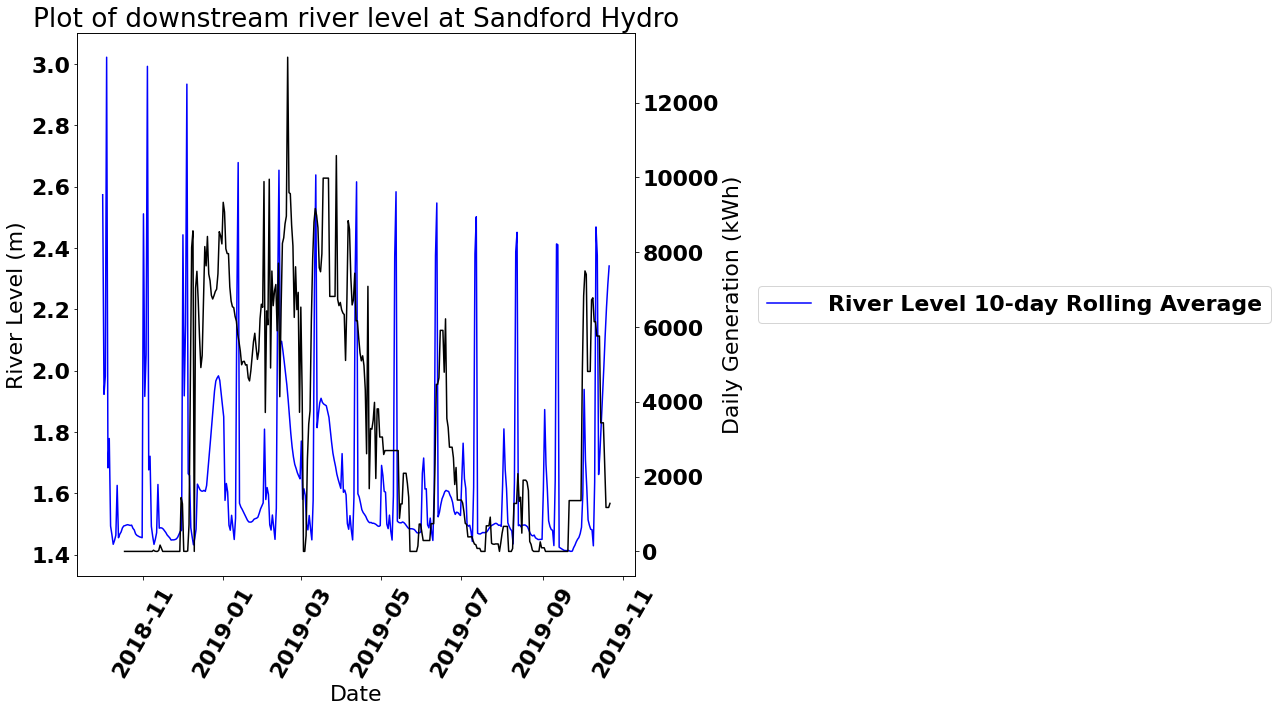

In [ ]:
# Let us plot the river level profile
level_fig, level_ax = plt.subplots(figsize = (10, 10))
level_ax.tick_params(axis='x', rotation=60)
gen_ax = level_ax.twinx() 
#level_ax.plot(ea_river_level_extracted['Date'], ea_river_level_extracted['Value[m]'], 'r', label = 'River level')  
gen_ax.plot(sandford_daily_df['Reading Date'], sandford_daily_df['Incremental Reading'], 'k-', label = 'Incremental Reading')
level_ax.plot(ea_river_level_extracted['Date'], ea_river_level_extracted['10_day_rolling_mean'], 'b', label = 'River Level 10-day Rolling Average')  

level_ax.set(title = 'Plot of downstream river level at Sandford Hydro', xlabel= 'Date', ylabel='River Level (m)')
gen_ax.set(ylabel= 'Daily Generation (kWh)')
level_ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

Now we want to calculate the correlation coefficient between the data sets, but we first need to ensure they are the same length by removing days which aren't present

The lengths of the data sets are:
- River level data: 386
- Generation data: 369

In [ ]:
river_level_copy = ea_river_level_extracted
river_level_copy['Date'] = river_level_copy['Date'].dt.date               # extract the date from the Timestamp
river_level_copy['Date'] = pd.to_datetime(river_level_copy['Date'])       # convert the datatypes to datetime


sandford_gen_copy = sandford_daily_df                                     # create a copy of the datasets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# get the list of dates which are in either of the datasets, but not both
dates_in_river_not_gen = set(river_level_copy['Date']) ^ set(sandford_daily_df['Reading Date'])     # the symmetric difference of the sets

In [ ]:
# remove the dates
for i in dates_in_river_not_gen:
  river_level_copy = river_level_copy[river_level_copy['Date'] != i]
  sandford_gen_copy = sandford_gen_copy[sandford_gen_copy['Reading Date'] != i]

Now there is an extra date in sandford gen_daily

In [ ]:
# calculate the correlation coefficient
r_gen_river = pearsonr(sandford_gen_copy['Incremental Reading'], river_level_copy['Value[m]'])
r_gen_river

(-0.13969387932557772, 0.00727801565193243)

This correlation is quite weak and may not be the best predictor for generation from the hydro. However, it is still worth investigating whether the river level can be used as a discriminator to determine when there will be no generation at the Hydro - i.e. when the screws are submerged

In [ ]:
# creating a dataframe of the the days when the generation was zero (or negative)
zero_gen_days = sandford_daily_df[sandford_daily_df['Incremental Reading'] <= 0]
zero_gen_days.reset_index(inplace = True, drop = True)

In [ ]:
#extract the list of days from the river level dataframe
zero_gen_dates = zero_gen_days['Reading Date']
zero_river_df = ea_river_level_extracted[ea_river_level_extracted['Date'].isin(zero_gen_dates)]

In [ ]:
ea_river_level_extracted.describe()

,Value[m],10_day_rolling_mean
count,386.000000,386.000000
mean,1.649394,1.647558
std,0.298177,0.288603
min,1.395000,1.410500
25%,1.477000,1.481125
50%,1.516000,1.521650
75%,1.648750,1.672875
max,2.829000,3.021500


However, we should split up the extracted dataframe between the summer and winter dates

In [ ]:
# define the summer and winter precipitation masks
# format of mask: YYYY-MM-DD
summer_start = pd.to_datetime('2018-06-01')
summer_end = pd.to_datetime('2018-08-31')

winter_start = pd.to_datetime('2018-12-01')
winter_end = pd.to_datetime('2019-02-28')

# define the summer and winter masks
summer_df = zero_river_df.loc[(zero_river_df['Date'] >= summer_start) & (zero_river_df['Date'] <= summer_end)]
winter_df = zero_river_df.loc[(zero_river_df['Date'] >= winter_start) & (zero_river_df['Date'] <= winter_end)]

In [ ]:
# describing the winter data frame
winter_df.describe()

,Value[m],10_day_rolling_mean
count,3.000000,3.000000
mean,2.231667,2.178567
std,0.653274,0.740652
min,1.478000,1.453300
25%,2.029500,1.801000
50%,2.581000,2.148700
75%,2.608500,2.541200
max,2.636000,2.933700


In [ ]:
winter_df

,Time stamp,Value[m],Date,10_day_rolling_mean
2433,12/03/2018 9:00:00,2.636,2018-12-03,2.1487
2464,12/04/2018 9:00:00,2.581,2018-12-04,2.9337
2647,12/10/2018 9:00:00,1.478,2018-12-10,1.4533


In [ ]:
zero_river_df

,Time stamp,Value[m],Date,10_day_rolling_mean
2653,18/10/2018 09:00:00,1.470,2018-10-18,1.4947
2654,19/10/2018 09:00:00,1.487,2018-10-19,1.4965
2655,20/10/2018 09:00:00,1.469,2018-10-20,1.4976
2656,21/10/2018 09:00:00,1.461,2018-10-21,1.4963
2657,22/10/2018 09:00:00,1.466,2018-10-22,1.4951
...,...,...,...,...
2986,16/09/2019 09:00:00,1.400,2019-09-16,1.4158
2987,17/09/2019 09:00:00,1.395,2019-09-17,1.4134
2988,18/09/2019 09:00:00,1.411,2019-09-18,1.4133
2989,19/09/2019 09:00:00,1.418,2019-09-19,1.4131


In [ ]:
zero_river_r = pearsonr(zero_river_df['Value[m]'], (zero_gen_days['Incremental Reading'] + np.random.randn(len(zero_river_df['Value[m]']))))
zero_river_r

We can see that the mean of the days when there is $ \leq 0 $ generation from the hydro is lower than the whole dataset. This does not support the idea that this dataset can be used to determine when there will be no generation from the hydro